# CNN Model Visualisation - Deconvolutional Network (DeconvNet)

## Table of contents
2. [Introduction](#Introduction)
3. [Examine the MNIST Handwriting Dataset](#Examine-the-MNIST-Handwriting-Dataset)
    1. [Prepare a CNN model to the dataset](#Prepare-a-CNN-model-to-the-dataset)
    2. [Define the CNN model](#Define-the-CNN-model)
    3. [Train the CNN model](#Train-the-CNN-model)
7. [Deconvolutional Networks Visualization Procedure](#Deconvolutional-Networks-Visualization-Procedure)
8. [Apply DeconvNets to the MNIST Handwriting Dataset](#Apply-DeconvNets-to-the-MNIST-Handwriting-Dataset)
    1. [Examine a zero](#Examine-a-zero)
    2. [Examine a four](#Examine-a-four)
    3. [Examine a nine](#Examine-a-nine)
9. [Conclusion](#Conclusion)

## Introduction
A lot of tutorials online seem to focus on the convolutional neural networks (CNN) accuracy when evaluating a test dataset. However, very few tutorials focus on the inner workings of a CNN or what a CNN model actually learns. More specifically, it is of interest to identify what the different filters (kernels) of the CNN model are learning. As part of this investigation multiple visualisation techniques will be applied to the MNIST handwriting dataset. 

In this notebook I will specifically examine the **Deconvolutional Network (Deconvnet) visualisation procedure** as defined by Zeiler and Fergus in their paper **Visualizing and Understanding Convolutional Networks** (https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf).

The Deconvolutional Network (Deconvnet) visualisation method will be applied to the MNIST handwriting dataset as it is very easy to interpret and produces nice results. The digits in the handwriting dataset are generally visualised in black and white, however, I found the default viridis colour pallet provided a clearer view of the digits, especially for the DeconvNet output, therefore, all images in this notebook will be visualised using the viridis colour pallet.

## Examine the MNIST Handwriting Dataset

In [1]:
# load the necessary libraries

# ML libraries
from keras.datasets import mnist
from keras import utils, initializers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Activation
import keras.backend as K

# general libraries
from math import floor
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
# load the MNIST handwriting dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

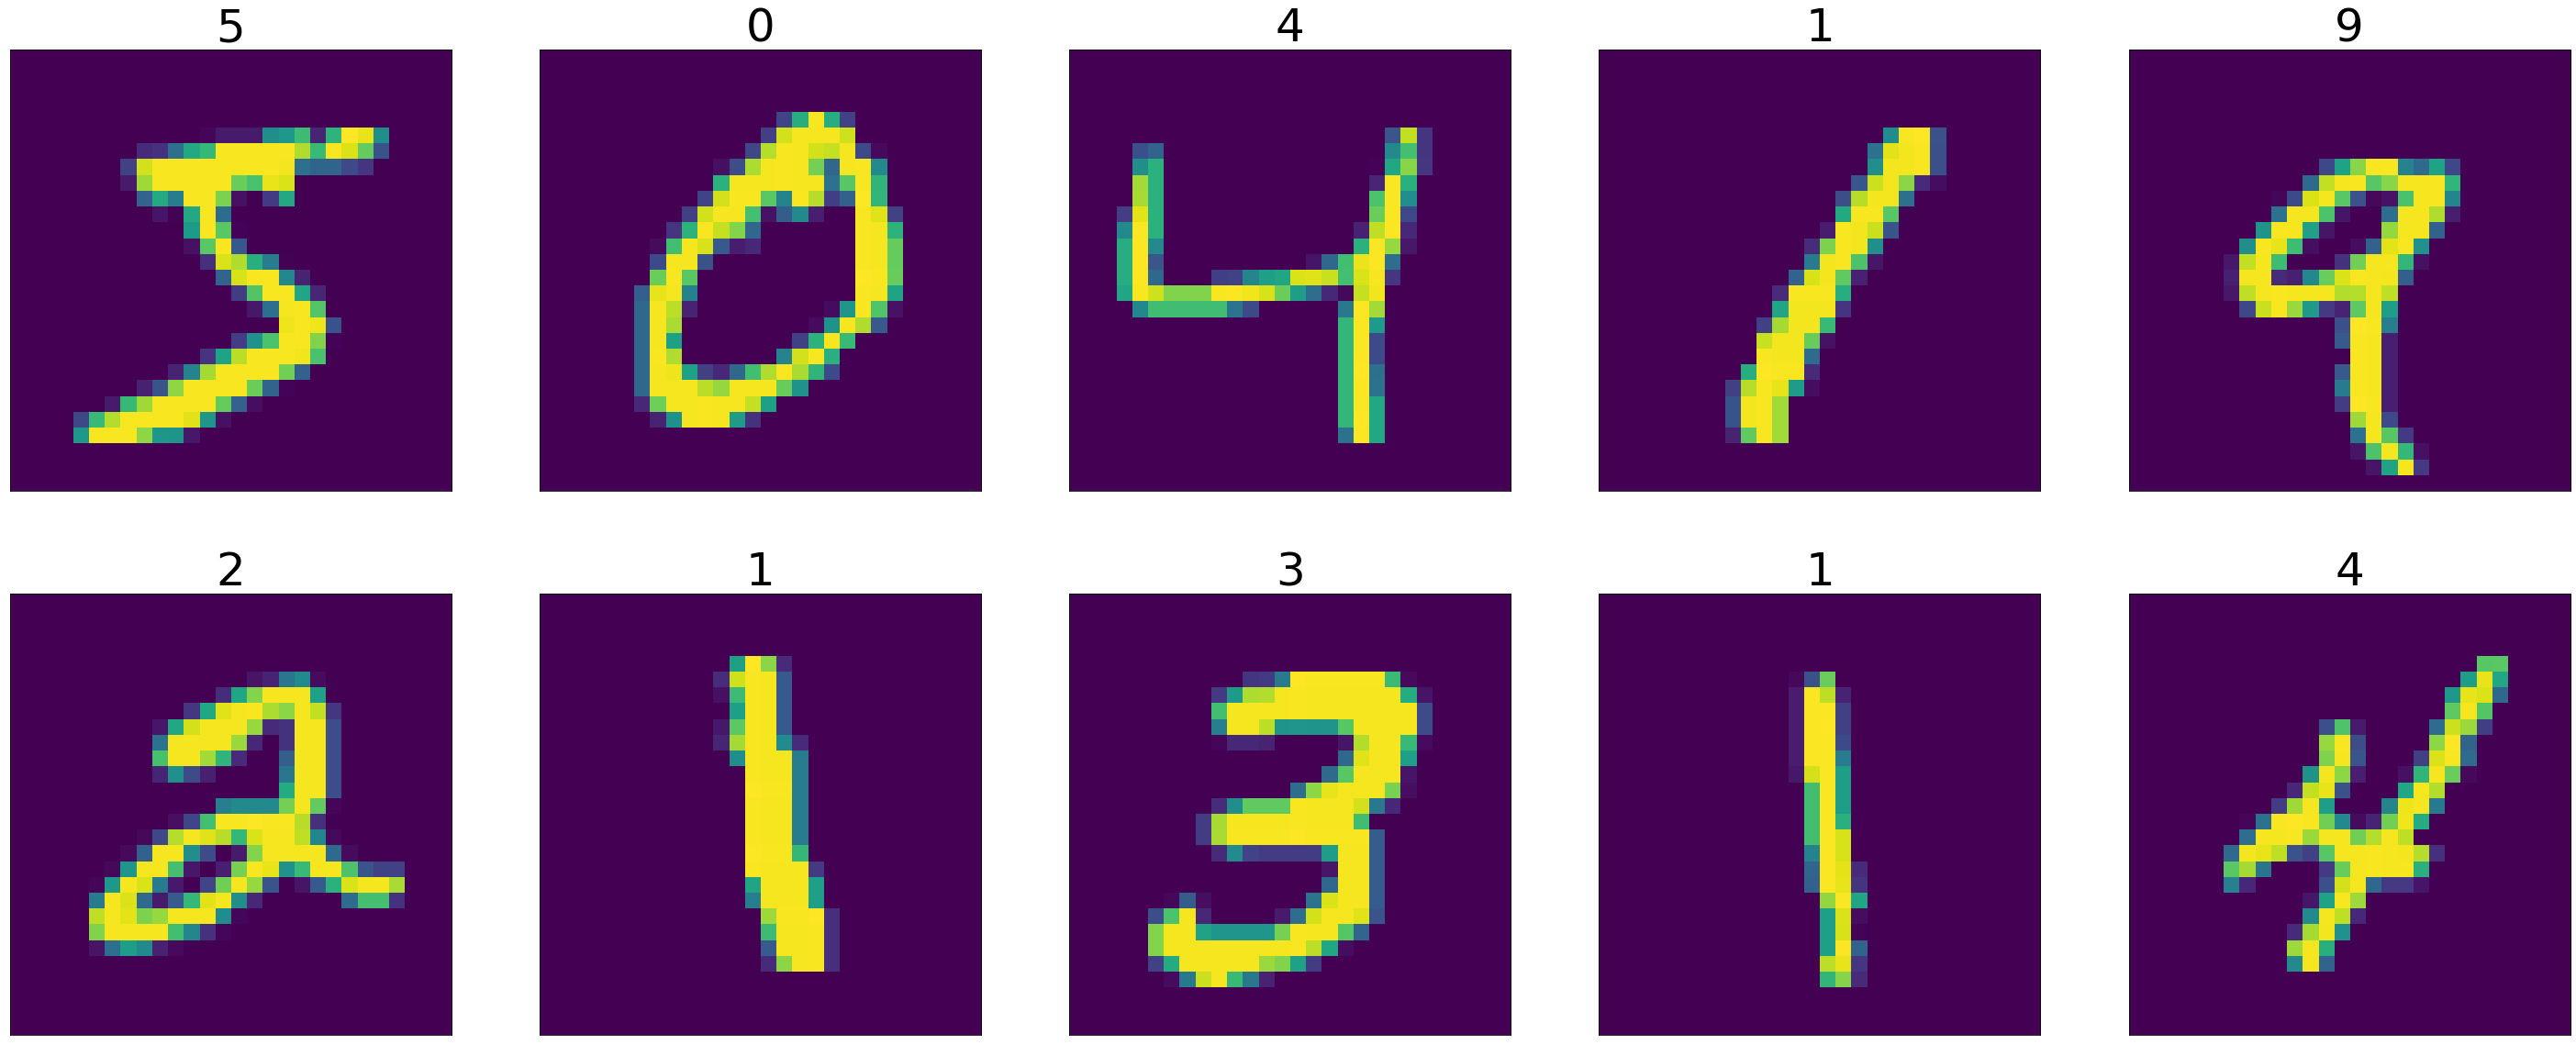

In [3]:
# examine some of the images
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

# examine the first 10 images
k = 0
for i in range(2):
    for j in range(5):
        axes[i][j].imshow(x_train[k].reshape(28, 28))
        axes[i][j].set_title(f'{y_train[k]}', fontsize=50)
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        k+=1

### Prepare a CNN model to the dataset

In [4]:
# reshape to be the images ([samples][width][height][channels])
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [5]:
# normalise the inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [6]:
# apply one hot encoding to the outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [7]:
# find the number of classes
num_classes = y_test.shape[1]

### Define the CNN model

In [8]:
# define the CNN model
model = Sequential()

# define two convolutional layers 
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding = 'same', name = 'conv_1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same', name = 'conv_2'))

# define a maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2), name = 'max_pool_1'))

# flatten
model.add(Flatten(name = 'flatten'))

# define the final two dense (fully connected layers)
model.add(Dense(250, activation='sigmoid', name = 'dense_1'))
model.add(Dense(num_classes, activation='softmax', name = 'dense_2'))

In [9]:
# compile the CNN model
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

In [10]:
# examine a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               3136250   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2510      
Total params: 3,157,576
Trainable params: 3,157,576
Non-trainable params: 0
____________________________________________

### Train the CNN model

In [11]:
# fit the model to the training dataset (evaluate on both the training and validation datasets)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3392 - accuracy: 0.8985 - val_loss: 0.1040 - val_accuracy: 0.9701
Epoch 2/5
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0850 - accuracy: 0.9760 - val_loss: 0.0629 - val_accuracy: 0.9812
Epoch 3/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0532 - accuracy: 0.9847 - val_loss: 0.0497 - val_accuracy: 0.9841
Epoch 4/5
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0430 - val_accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.0385 - val_accuracy: 0.9866


In [12]:
# evaluate of the final model on the validation dataset
scores = model.evaluate(x_test, y_test)


10000/10000 [==============================] - 4s 427us/step


In [13]:
# examine the models accuracy on the validation dataset
scores[1]

0.9865999817848206

## Deconvolutional Networks Visualization Procedure

Deconvolutional networks are a visualisation technique which identifies the patterns in an input image which excite individual feature maps at any layer in a CNN model. 

A deconvolutional network can be thought of as a reversed convolutional neural network, where instead of mapping pixels to features, feature activations are projected back to the input pixel space.

To examine the inner workings of a CNN model, a deconvolutional network is attached to each layer of the model. Each deconvolutional layer provides a method to invert/reverse each layer of the CNN model. 

For example, each convolutional layer has an associated deconvolutional layer which inverts to convolution by simply flipping each individual filter horizontally and vertically and convolving this new filter with the input to the deconvolutional layer. Similarly, the MaxPooling layers can be approximately inversed by the MaxUnpooling method. During the MaxPooling procedure the locations of the max values in each pooling region are recorded, these locations are subsequently used by the MaxUnpooling method to place the reconstructions from the layer above into their appropriate locations. The relu activation functions are used for both forwards and backwards transformations.

To start the DeconvNet procedure an input image is passed to the pre-trained CNN model, the features of this image are computed in the usual manner. To examine what a specific filter (or neuron) in a convolutional layer has learned, all other activations are set to zero and these feature maps are passed as input to the deconvolutional network. This input is subsequently unpooled, rectified and filtered until an image is returned to the input layer. 

In [14]:
class DConvolution2D(object):
    
    # initalise the DConvolutional layer
    def __init__(self, layer):
        
        # define the layer name
        self.layer = layer
        
        # get the weights and biases of that convolutional layer
        weights = layer.get_weights()
        
        # assign the weights and biases
        W = weights[0]
        b = weights[1]
        
        # define the number of filters, and the shape of the kernel
        filters = W.shape[3]
        up_row = W.shape[0]
        up_col = W.shape[1]
        
        # define the shape of the input image
        input_img = Input(shape = layer.input_shape[1:])
    
        # define the convolutional layer 
        # (including same padding ensures that the input and output dimensions are the same)
        output = Conv2D(filters, (up_row, up_col), kernel_initializer=initializers.Constant(W),
                                   bias_initializer=initializers.Constant(b), padding='same')(input_img)
        
        # return the output from the convolutional layer given the input
        self.up_func = K.function([input_img, K.learning_phase()], [output])
        
        # deconv filter (exchange number of filters and depth of each filter)
        W = np.transpose(W, (0,1,3,2))
        
        # rotate the filters vertically and horizontally, required to invert the convolutional layer
        W = W[::-1, ::-1,:,:]
        
        # define the number of filters and kernel shape
        down_filters = W.shape[3]
        down_row = W.shape[0]
        down_col = W.shape[1]
        b = np.zeros(down_filters)
        
        # define the input shape of the deconvolutional layer
        input_d = Input(shape = layer.output_shape[1:])
        
        # define the deconvolutional layer, this time initialising the with the transformed weights
        # (including same padding ensures that the input and output dimensions are the same)
        output = Conv2D(down_filters, (down_row, down_col), kernel_initializer=initializers.Constant(W),
                                   bias_initializer=initializers.Constant(b), padding='same')(input_d)
        
        # return the output from the deconvolutional layer given the input
        self.down_func = K.function([input_d, K.learning_phase()], [output])

    def up(self, data, learning_phase = 0):
        
        # apply the forward convolution
        self.up_data = self.up_func([data, learning_phase])
        self.up_data = np.squeeze(self.up_data, axis=0)
        
        return self.up_data

    def down(self, data, learning_phase = 0):
        
        # apply the backward convolution
        self.down_data = self.down_func([data, learning_phase])
        self.down_data = np.squeeze(self.down_data, axis=0)

        return self.down_data

class DActivation(object):
    
    # initialise the DActivation layer
    def __init__(self, layer):
        
        # define the layer name
        self.layer = layer
        
        # define the activation function associated with the layer
        self.activation = layer.activation
        
        # create a placeholder to store the input values
        input = K.placeholder(shape = layer.output_shape)
        
        # calculate the output of the activation function
        output = self.activation(input)

        # according to the original paper, forward pass and backward pass are the same relu activation function
        
        # define the forward pass activation method
        self.up_func = K.function([input, K.learning_phase()], [output])
        
        # define the backward transformed activation method
        self.down_func = K.function([input, K.learning_phase()], [output])

   
    def up(self, data, learning_phase = 0):
        
        # apply the forward activation function
        self.up_data = self.up_func([data, learning_phase])
        self.up_data = np.squeeze(self.up_data, axis=0)

        return self.up_data

   
    def down(self, data, learning_phase = 0):
        
        # apply the backwards transformed activation function
        self.down_data = self.down_func([data, learning_phase])
        self.down_data = np.squeeze(self.down_data, axis=0)

        return self.down_data

class DInput(object):

    def __init__(self, layer):
        
        # define the layer
        self.layer = layer
    
    # the input and output of the input layer are the same
    def up(self, data, learning_phase = 0):

        self.up_data = data

        return self.up_data
    
    def down(self, data, learning_phase = 0):

        data = numpy.expand_dims(data, axis=0)
        self.down_data = data

        return self.down_data

# define the DDense class
class DDense(object):
      
    # initialise the class
    def __init__(self, layer):
        
        # define the layer
        self.layer = layer
        
        # define the layers weights and biases
        weights = layer.get_weights()
        W = weights[0]
        b = weights[1]
        
        # define the input shape of the forward dense layer
        input = Input(shape = layer.input_shape[1:])
        
        # define the output shape of the forward dense layer 
        # (based on the input shape), also define this layers weights and biases
        output = Dense(layer.output_shape[1], kernel_initializer=initializers.Constant(W), 
                                    bias_initializer=initializers.Constant(b))(input)
        
        # define the forward pass function which takes the inputs returns the layer outputs
        self.up_func = K.function([input, K.learning_phase()], [output])
        
        # transpose the weights for the backwards dense layer
        W = W.transpose()
        
        # define the input shape of the backwards transformed dense layer
        self.input_shape = layer.input_shape
        
        # define the output shape of the backwards transformed dense layer
        self.output_shape = layer.output_shape
        
        # define the initial biases of the backwards transformed dense layer
        b = np.zeros(self.input_shape[1])
        
        # define the input shape of the backwards transformed dense layer
        input = Input(shape = self.output_shape[1:])
        
        # define the output shape of the backwards transformed dense layer
        output = Dense(self.input_shape[1], kernel_initializer=initializers.Constant(W), 
                                    bias_initializer=initializers.Constant(b))(input)
        
        # define the backwards transformed dense layer function
        self.down_func = K.function([input, K.learning_phase()], [output])
    

    def up(self, data, learning_phase = 0):
        
        # apply the forward dense layer function
        self.up_data = self.up_func([data, learning_phase])
        self.up_data = np.squeeze(self.up_data, axis=0)

        return self.up_data
        
    def down(self, data, learning_phase = 0):
        
        # apply the backwards transformed dense layer
        self.down_data = self.down_func([data, learning_phase])
        self.down_data = np.squeeze(self.down_data, axis=0)

        return self.down_data

# define the DFlatten class
class DFlatten(object):
    
    # initialise the DFlatten class
    def __init__(self, layer):
           
        # define the layer
        self.layer = layer
        
        # define the input shape
        self.shape = layer.input_shape[1:]
        
        # define the forward flatten function
        self.up_func = K.function([layer.input, K.learning_phase()], [layer.output])

    # Flatten 2D input into 1D output
    def up(self, data, learning_phase = 0):
        
        # apply the forward flattening function
        self.up_data = self.up_func([data, learning_phase])
        self.up_data = np.squeeze(self.up_data, axis=0)

        return self.up_data

    # Reshape 1D input into 2D output
    def down(self, data, learning_phase = 0):
        
        # define the output shape of the data
        new_shape = [data.shape[0]] + list(self.shape)
        
        # ensure that the products of the new shape and the old shape are equal
        assert np.prod(self.shape) == np.prod(data.shape[1:])
        
        # define the new output shape
        self.down_data = np.reshape(data, new_shape)

        return self.down_data

# define the DPooling class
class DPooling(object):
    
    # initalise the class
    def __init__(self, layer):
        
        # define the layer
        self.layer = layer
        
        # define the poolsize 
        self.poolsize = layer.pool_size
       
    
    def up(self, data, learning_phase = 0):

        [self.up_data, self.switch] = self.__max_pooling_with_switch(data, self.poolsize)

        return self.up_data

    def down(self, data, learning_phase = 0):
      
        self.down_data = self.__max_unpooling_with_switch(data, self.switch)
        return self.down_data
    
    def __max_pooling_with_switch(self, input, poolsize):
        
        # create a zero matrix of input shape
        switch = np.zeros(input.shape)
        
        # place the input shape into a list
        out_shape = list(input.shape)
        
        # define the row and column length of the poolsize matrix
        row_poolsize = int(poolsize[0])
        col_poolsize = int(poolsize[1])
        
        # define the output shape of the pooling layer
        out_shape[1] = floor(out_shape[1] / poolsize[0])
        out_shape[2] = floor(out_shape[2] / poolsize[1])
        
        # create a zero matrix in the output shape
        pooled = np.zeros(out_shape)
        
        # for every sample image
        for sample in range(input.shape[0]):
            
            # for each filter
            for dim in range(input.shape[3]):
                
                # for each row value of the pooling matrix
                for row in range(out_shape[1]):
                    
                    # for each column value of the pooling matrix
                    for col in range(out_shape[2]):
                        
                        # for each patch in the image as defined by the pooled window
                        patch = input[sample, 
                                row * row_poolsize : (row + 1) * row_poolsize,
                                col * col_poolsize : (col + 1) * col_poolsize, dim]
                        
                        # find the max value of each patch
                        max_value = patch.max()
                        
                        # all the max value to the pooled zero matrix
                        pooled[sample, row, col, dim] = max_value
                        
                        # find the row index of each maximum value
                        max_col_index = patch.argmax(axis = 1)
                        
                        # find the max value in each row
                        max_cols = patch.max(axis = 1)
                        
                        # find the maximum index among the rows
                        max_row = max_cols.argmax()
                        
                        # find the row index associated with the maximum among the rows
                        max_col = max_col_index[max_row]
                        
                        # define the location of the max pooled value
                        switch[sample, 
                                row * row_poolsize + max_row, 
                                col * col_poolsize + max_col,
                              dim]  = 1

        return [pooled, switch]
    
    
    # Compute unpooled output using pooled data and switch
    def __max_unpooling_with_switch(self, input, switch):
        '''
        Compute unpooled output using pooled data and switch
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
            switch: switch storing location of each elements
        # Returns
            Unpooled result
        '''
        # define the output shape
        out_shape = switch.shape
        
        # define a matrix of 0s of output shape
        unpooled = np.zeros(out_shape)
        
        # for each sample 
        for sample in range(input.shape[0]):
            
            # for each filter 
            for dim in range(input.shape[3]):
                
                # create a matrix of 1s of size output/input shapes  
                tile = np.ones((switch.shape[1] // input.shape[1], 
                                switch.shape[2] // input.shape[2]))
                
                # calculate the krondecker product of the input and the 1s matrix
                out = np.kron(input[sample, :, :, dim], tile)
                
                # multiply the transformed output by the switch locations
                unpooled[sample, :, :, dim] = out * switch[sample, :, :, dim]
                
        return unpooled

In [15]:
def visualize(model, data, layer_name, feature_to_visualize):
    
    # create a list to store the deconv layers
    deconv_layers = []
    
    # stack layers
    # for each layer in the model
    for i in range(len(model.layers)):
        
        # if the layer is a convolutional layer
        if isinstance(model.layers[i], Conv2D):
            
            # define the convolutional and deconvolutional layers associated with the convolutional layers
            deconv_layers.append(DConvolution2D(model.layers[i]))
            
            # define the activation functions assocatied with the convolutional layers
            deconv_layers.append(DActivation(model.layers[i]))
            
        # if the layer is a MaxPooling layer
        elif isinstance(model.layers[i], MaxPooling2D):
            
            # initialise the DPooling Class
            deconv_layers.append(DPooling(model.layers[i]))
            
        # if the layer is a Dense layer
        elif isinstance(model.layers[i], Dense):
            
            # define the forwards and backwards dense layers
            deconv_layers.append(DDense(model.layers[i]))
            
            # define the activations functions assocaited with the forwards and backwards dense layers
            deconv_layers.append(DActivation(model.layers[i]))
            
        # if the layer is an activation layer
        elif isinstance(model.layers[i], Activation):
            
            # define the forward and backwards activation layer
            deconv_layers.append(DActivation(model.alyers[i]))
        
        # if the layer is a flatten layer
        elif isinstance(model.layers[i], Flatten):
            
            # define the forward and backward flatten layers
            deconv_layers.append(DFlatten(model.layers[i]))
        
        # if the input layer
        elif isinstance(model.layers[i], InputLayer):
            
            # define the input input layer class
            deconv_layers.append(DInput(model.layers[i]))
        
        else:
            print('Cannot handle this type of layer')
            print(model.layers[i].get_config())
            sys.exit()
        
        # once we reach the specific layer of interest break
        if layer_name == model.layers[i].name:
            break
    
    # forward pass
    
    # apply the first layer to the input image
    deconv_layers[0].up(data)
            
    # take the previous layers output and forward pass it through each of the forward layers
    for i in range(1, len(deconv_layers)):
        
        # take the data from the previous layer and apply up function from associated layer
        deconv_layers[i].up(deconv_layers[i - 1].up_data)
    
    # store the final output layers data
    output = deconv_layers[-1].up_data
    
    # if the number of dimensions is 2 or 4
    assert output.ndim == 2 or output.ndim == 4
    
    # if the output has two dimensions
    if output.ndim == 2:
        
        # define the neuron of interest (filter of interest)
        feature_map = output[:, feature_to_visualize]
        
    # otherwise, there are 4 dimensions
    else:
        
        # define the filter of interest
        feature_map = output[:,:, :, feature_to_visualize]

    # define a matrix of the same size as the output of 0s
    output = np.zeros_like(output)
    
    # add back in the filter of interst (therefore having the filter of interest and 0s elsewhere)
    if 2 == output.ndim:
        output[:, feature_to_visualize] = feature_map
    
    else:
        output[:,: , :, feature_to_visualize] = feature_map


    # backward pass
    
    # apply the first backwards layer to the last forwards layer
    deconv_layers[-1].down(output)
    
    # iteritively work backwards through the different backwards layers
    for i in range(len(deconv_layers) - 2, -1, -1):
        
        # apply each of the backwards layers
        deconv_layers[i].down(deconv_layers[i + 1].down_data)
    
    # define the final layer output layer
    deconv = deconv_layers[0].down_data
    
    # return to image format
    deconv = deconv.squeeze()

    return deconv 

## Apply DeconvNets to the MNIST Handwriting Dataset

In [16]:
def output_deconvnet_images(input_image, layer_name):
    """
    This function takes an image and the layer name as input. The image is prepared and passed to the deconvnet
    function which returns images of the input patterns associated with a specific neuron, i.e. the input patterns
    which cause a given activation in the feature map.
    """
    
    # prepare the image for the DeconvNet (ensure that the input image is of shape (1,28,28,1))
    input_image = input_image[np.newaxis, :]
    input_image = input_image.astype(np.float)
    
    # create a list to store the outputs
    deconv_list = []

    # for the first 10 neurons
    for neuron_idx in range(0, 10):

        # obtain the deconvNet for each of the first 10 neurons in the third layer
        deconv = visualize(model, input_image, layer_name, neuron_idx)

        # pre-process the image
        deconv = deconv - deconv.min()
        deconv *= 1.0 / (deconv.max() + 1e-8) 
        img = (deconv * 255).astype(np.uint8)

        # add the processed image to the list
        deconv_list.append(img)

    # examine some of the images
    fig, axes = plt.subplots(2, 5, figsize=(50, 20))
    k = 0
    
    # examine the first 10 images
    print('\x1b[1;31m' + f'{layer_name}' +  '\x1b[0m' + '\n')
    
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(deconv_list[k])
            axes[i][j].set_title(f'filter = {k+1}', fontsize=50)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            k+=1

### Examine a zero

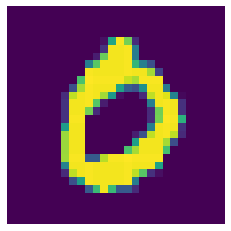

In [17]:
# examine an image of a zero
_ = plt.imshow(x_test[3].reshape(28, 28))
_ = plt.axis('off')

conv_1



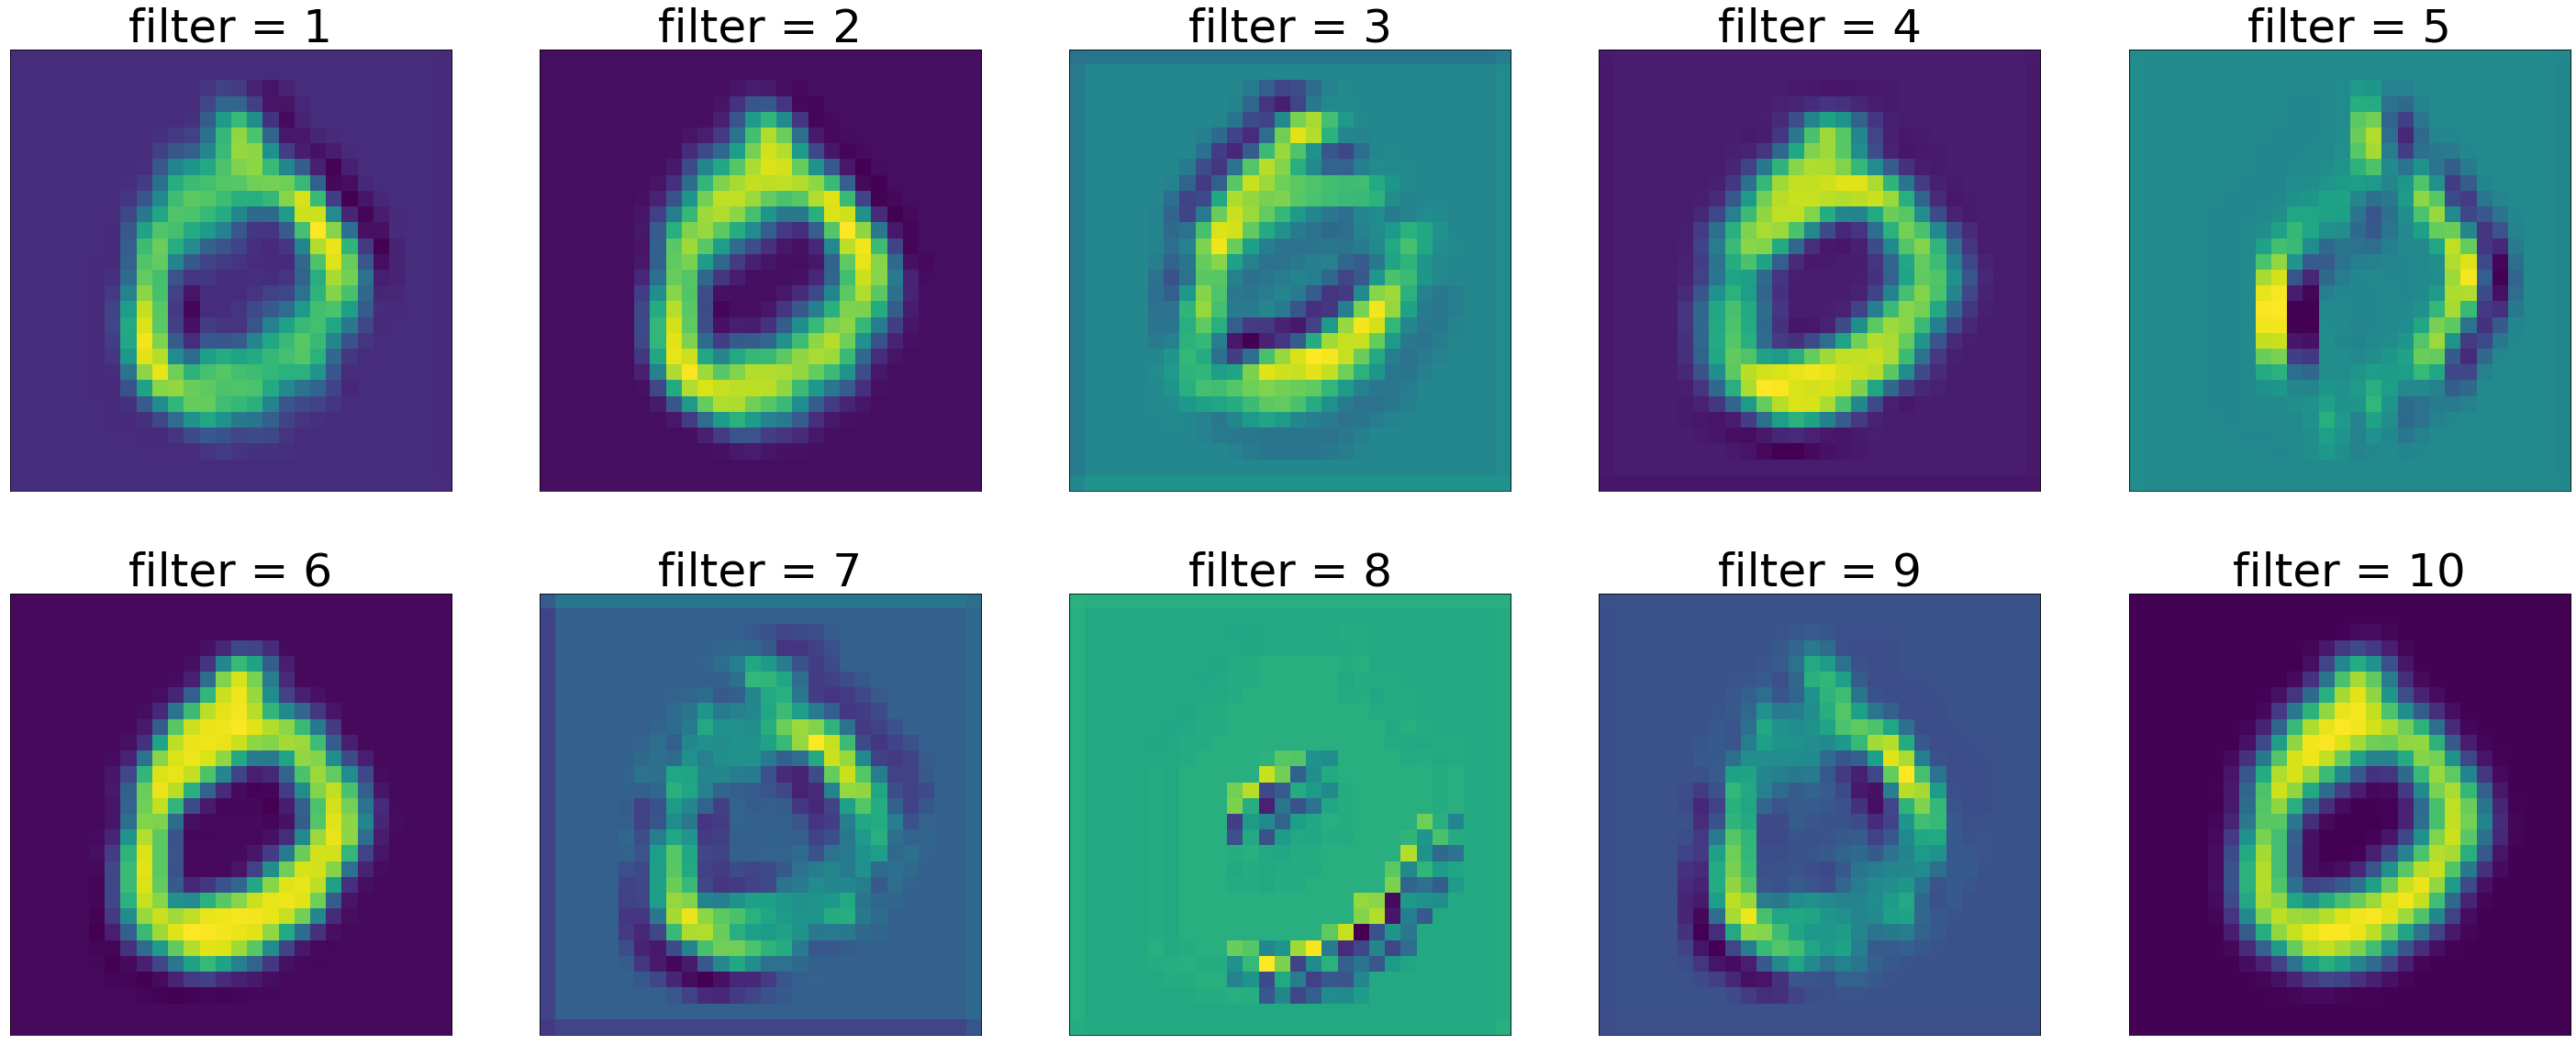

In [18]:
# examine the image patterns associated with each filter in the first convolutional layer
output_deconvnet_images(x_test[3], 'conv_1')

It appears that the first convolutional layer is identifying the overall outline of the input image of a zero. 

conv_2



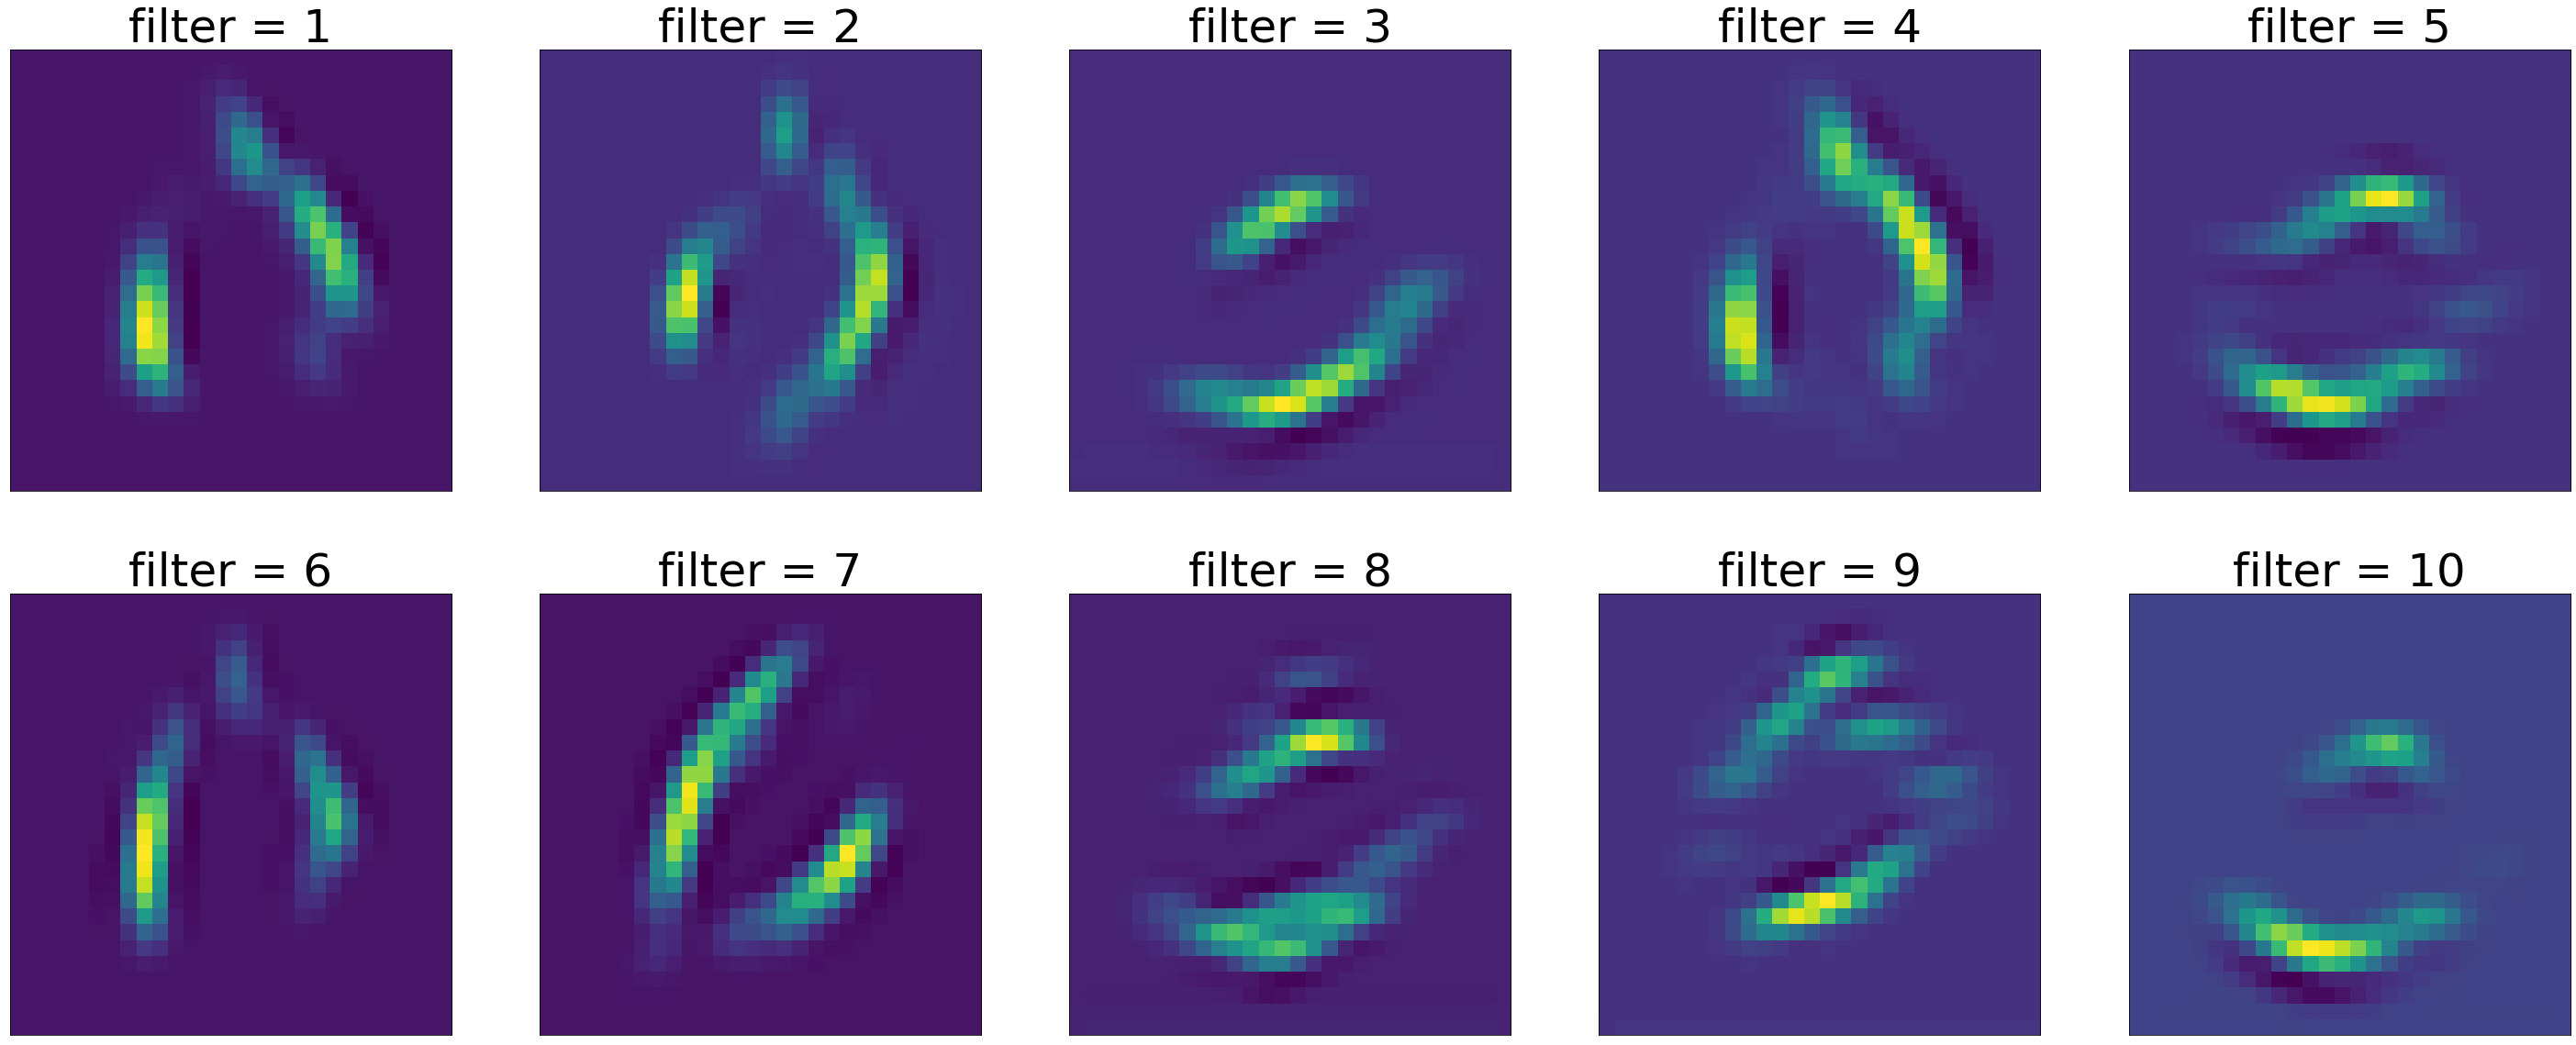

In [19]:
# examine the image patterns associated with each filter in the second convolutional layer
output_deconvnet_images(x_test[3], 'conv_2')

The second convolutional layer appears to be able to identify more specific patterns with different filters identifying the different components that combine to compose a 0. For example, filter 10 appears to identify the bottom curve of the zero, filter 5 identifying the top curve, while filters 6 and 4 look to identify the left and right curves, respectively.

### examine a four

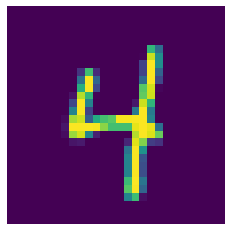

In [20]:
# examine an image of a 4
_ = plt.imshow(x_test[19].reshape(28, 28))
_ = plt.axis('off')

conv_1



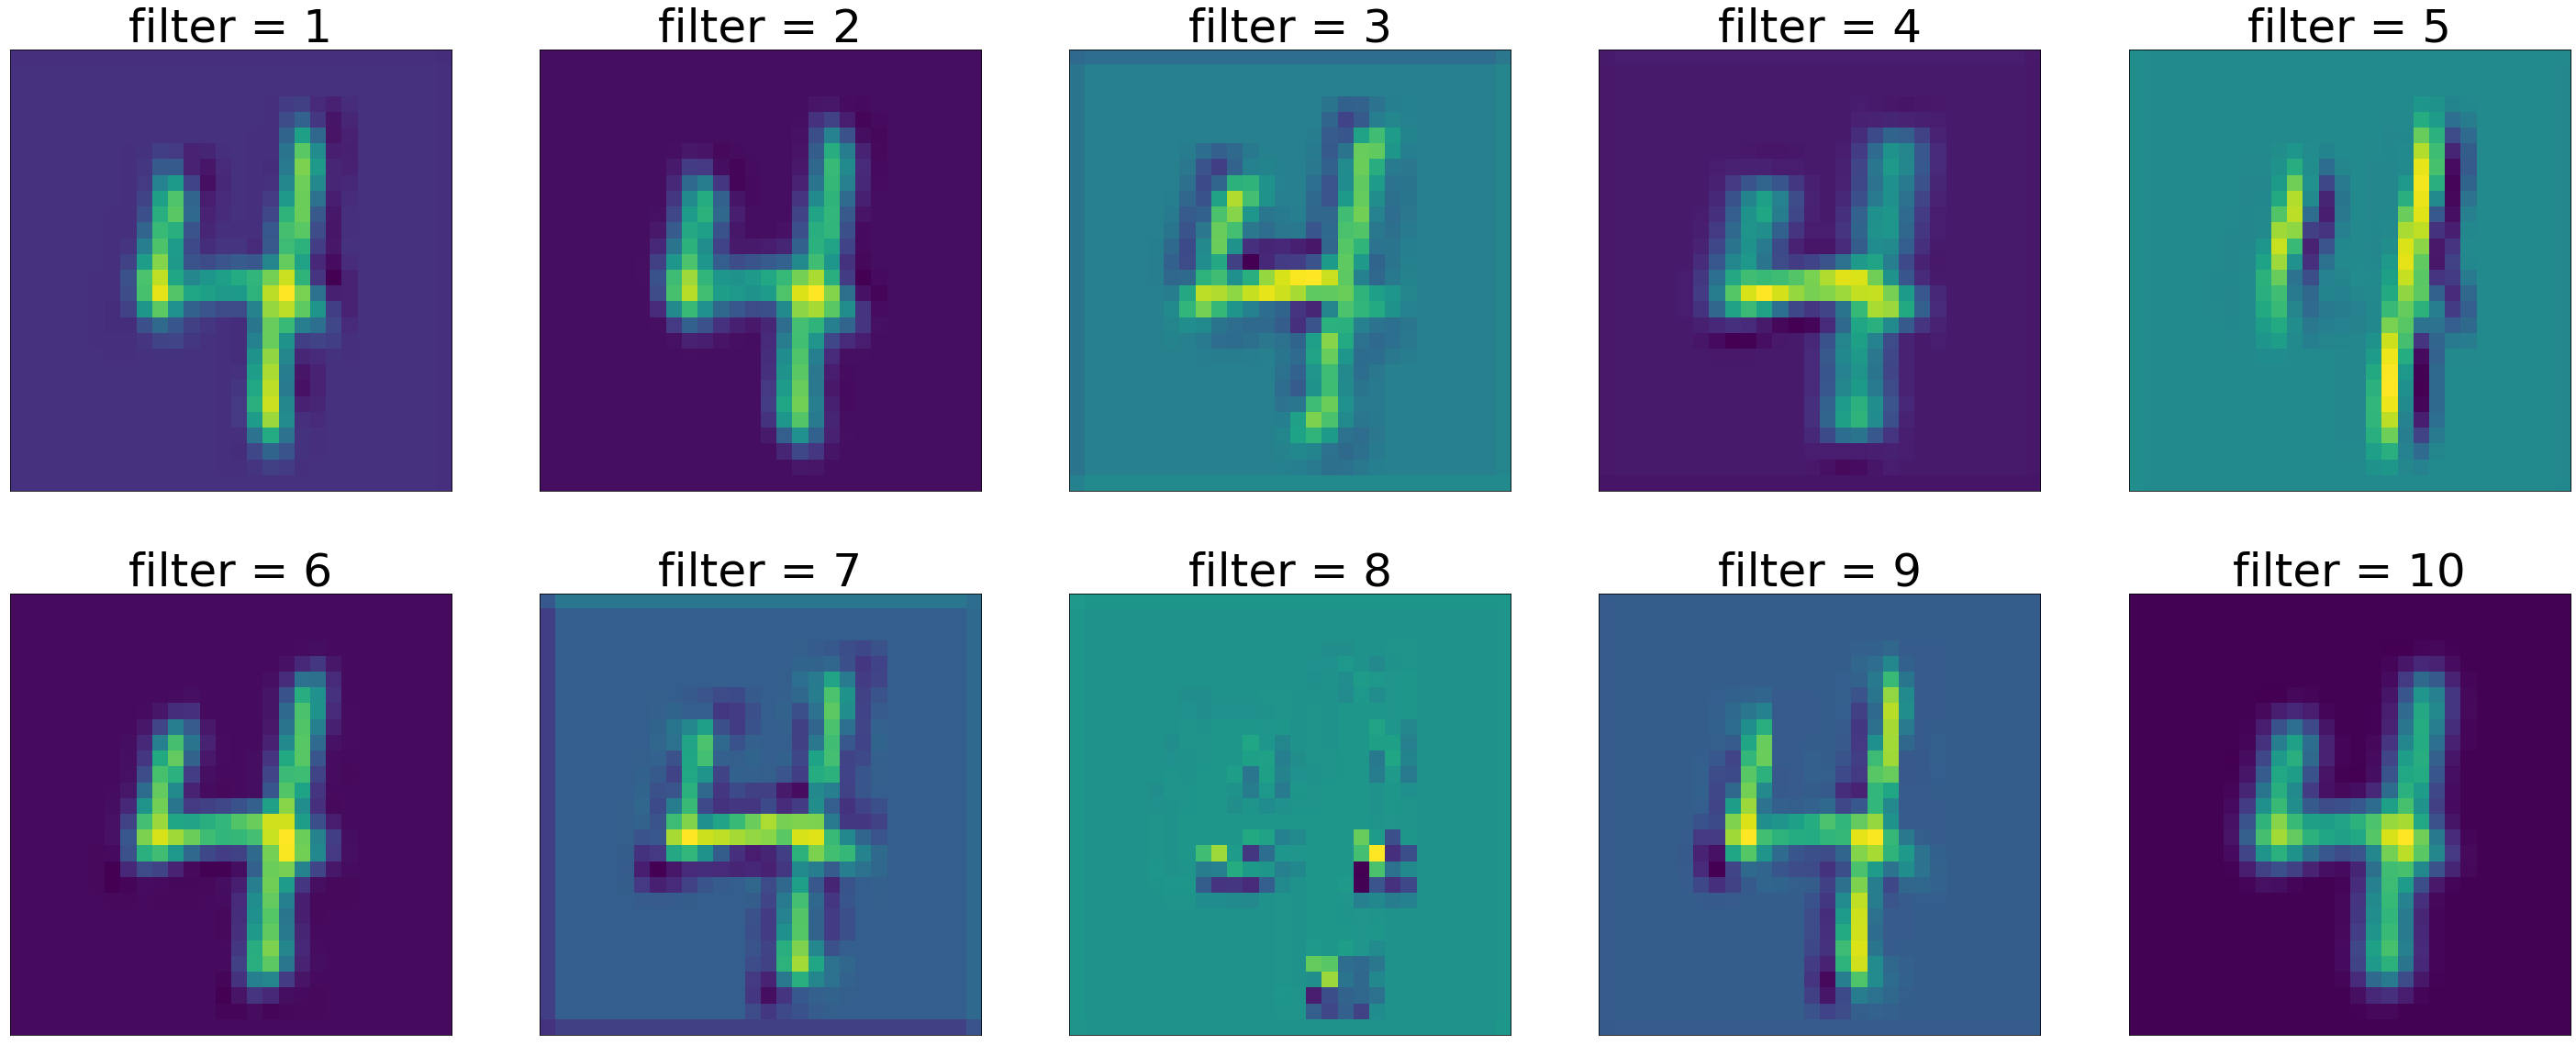

In [21]:
# examine the image patterns associated with each filter in the second convolutional layer
output_deconvnet_images(x_test[19], 'conv_1')

As before, it seems that the first convolutional layer is identifying the outline of the number 4. 

conv_2



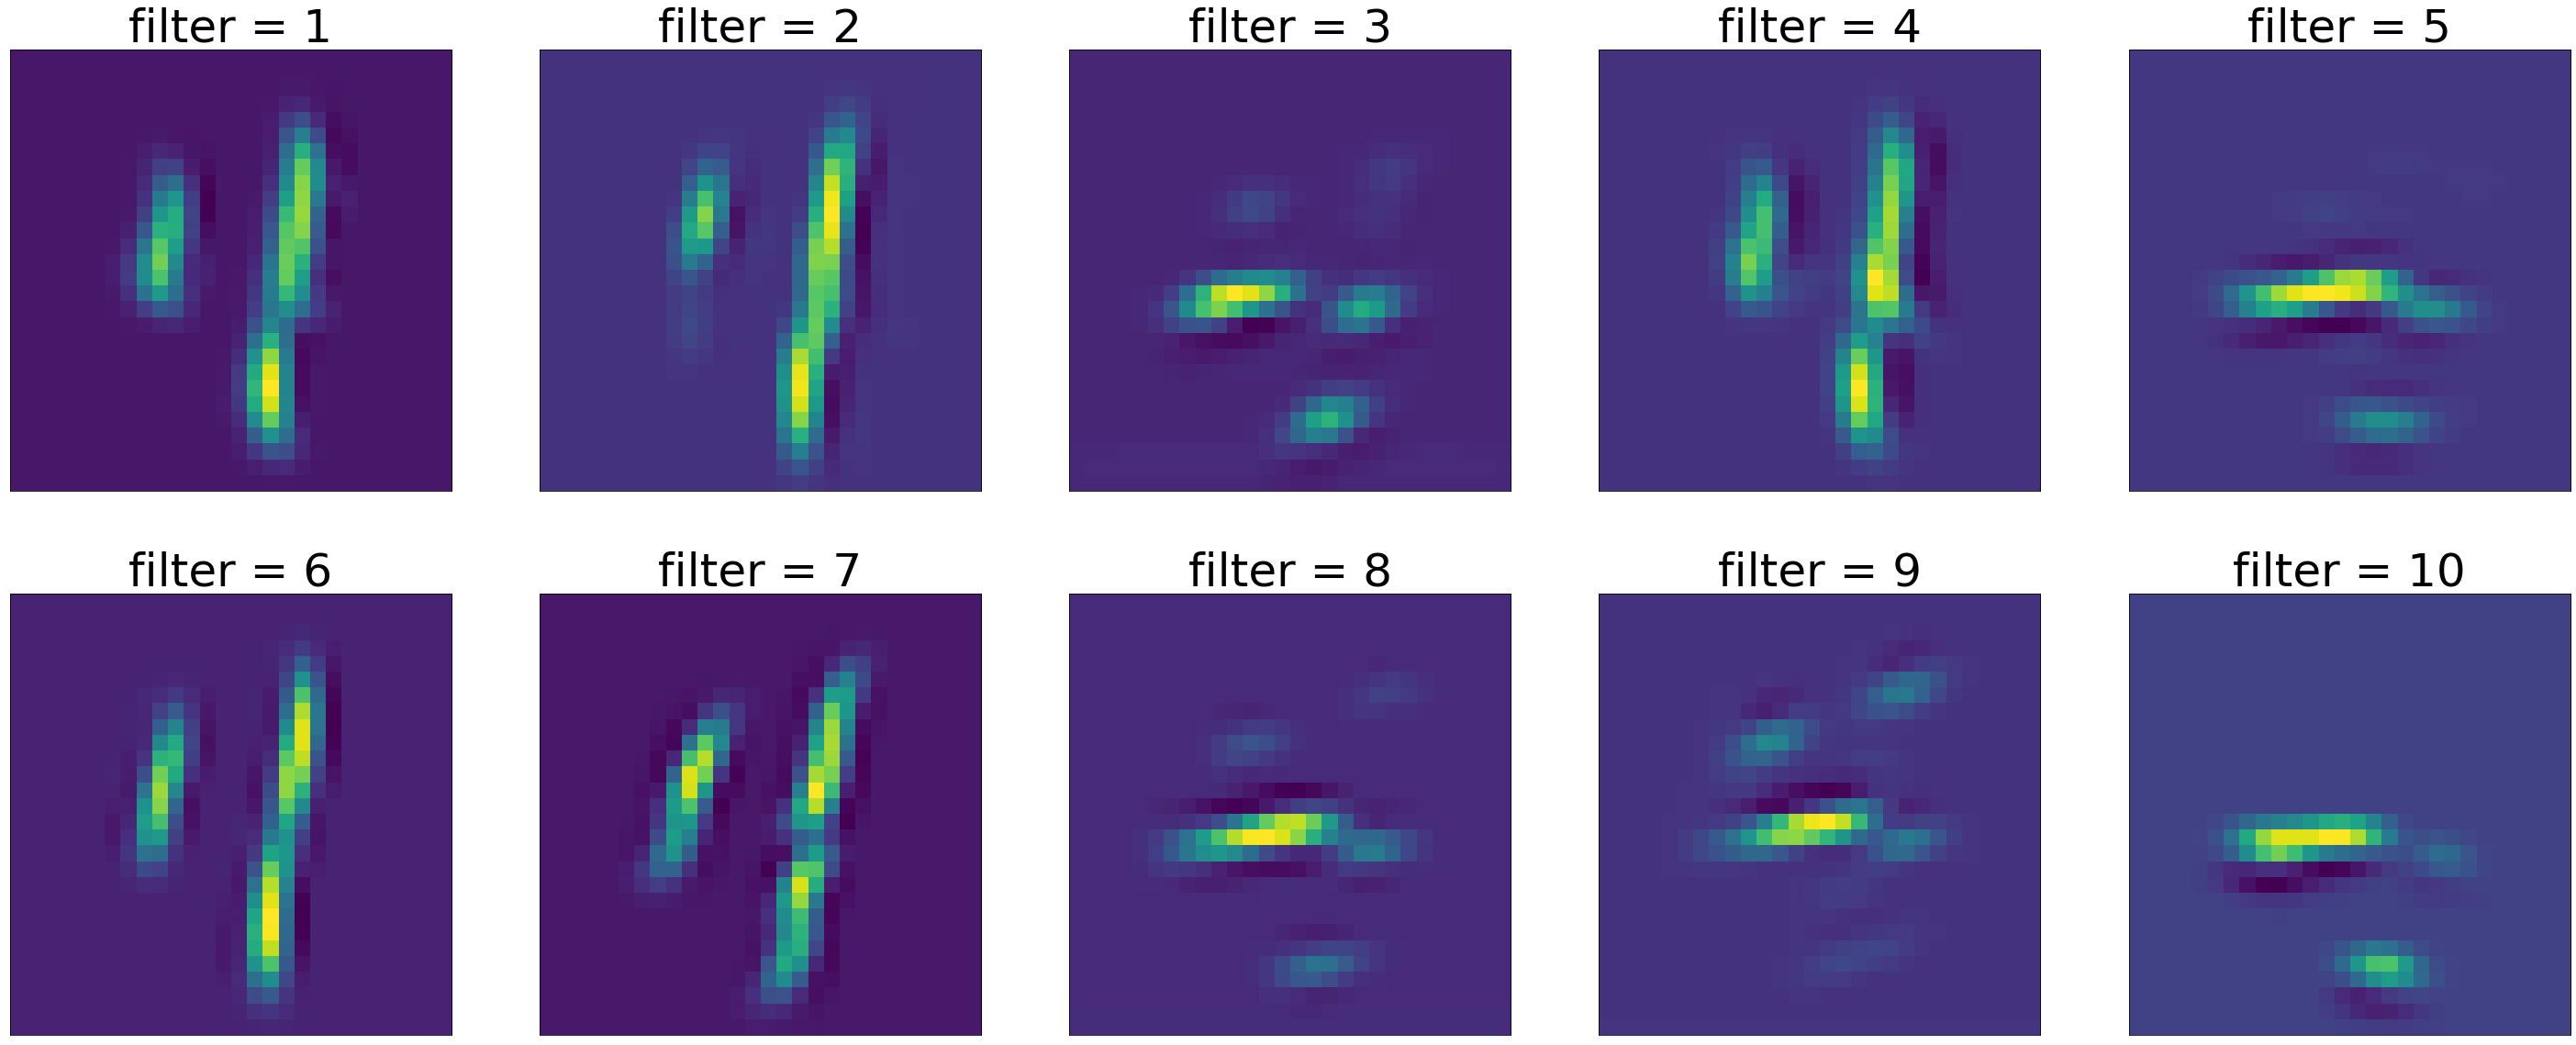

In [22]:
# examine the image patterns associated with each filter in the second convolutional layer
output_deconvnet_images(x_test[19], 'conv_2')

Again it appears that the second convolutional layer is identifying more specific features of the number 4. In this case it appears that the different filters are identifying the different components which when combined together form the number four. 

### examine a nine

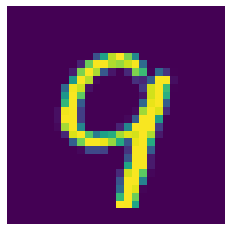

In [23]:
# examine an image of a 9
_ = plt.imshow(x_test[16].reshape(28, 28))
_ = plt.axis('off')

conv_1



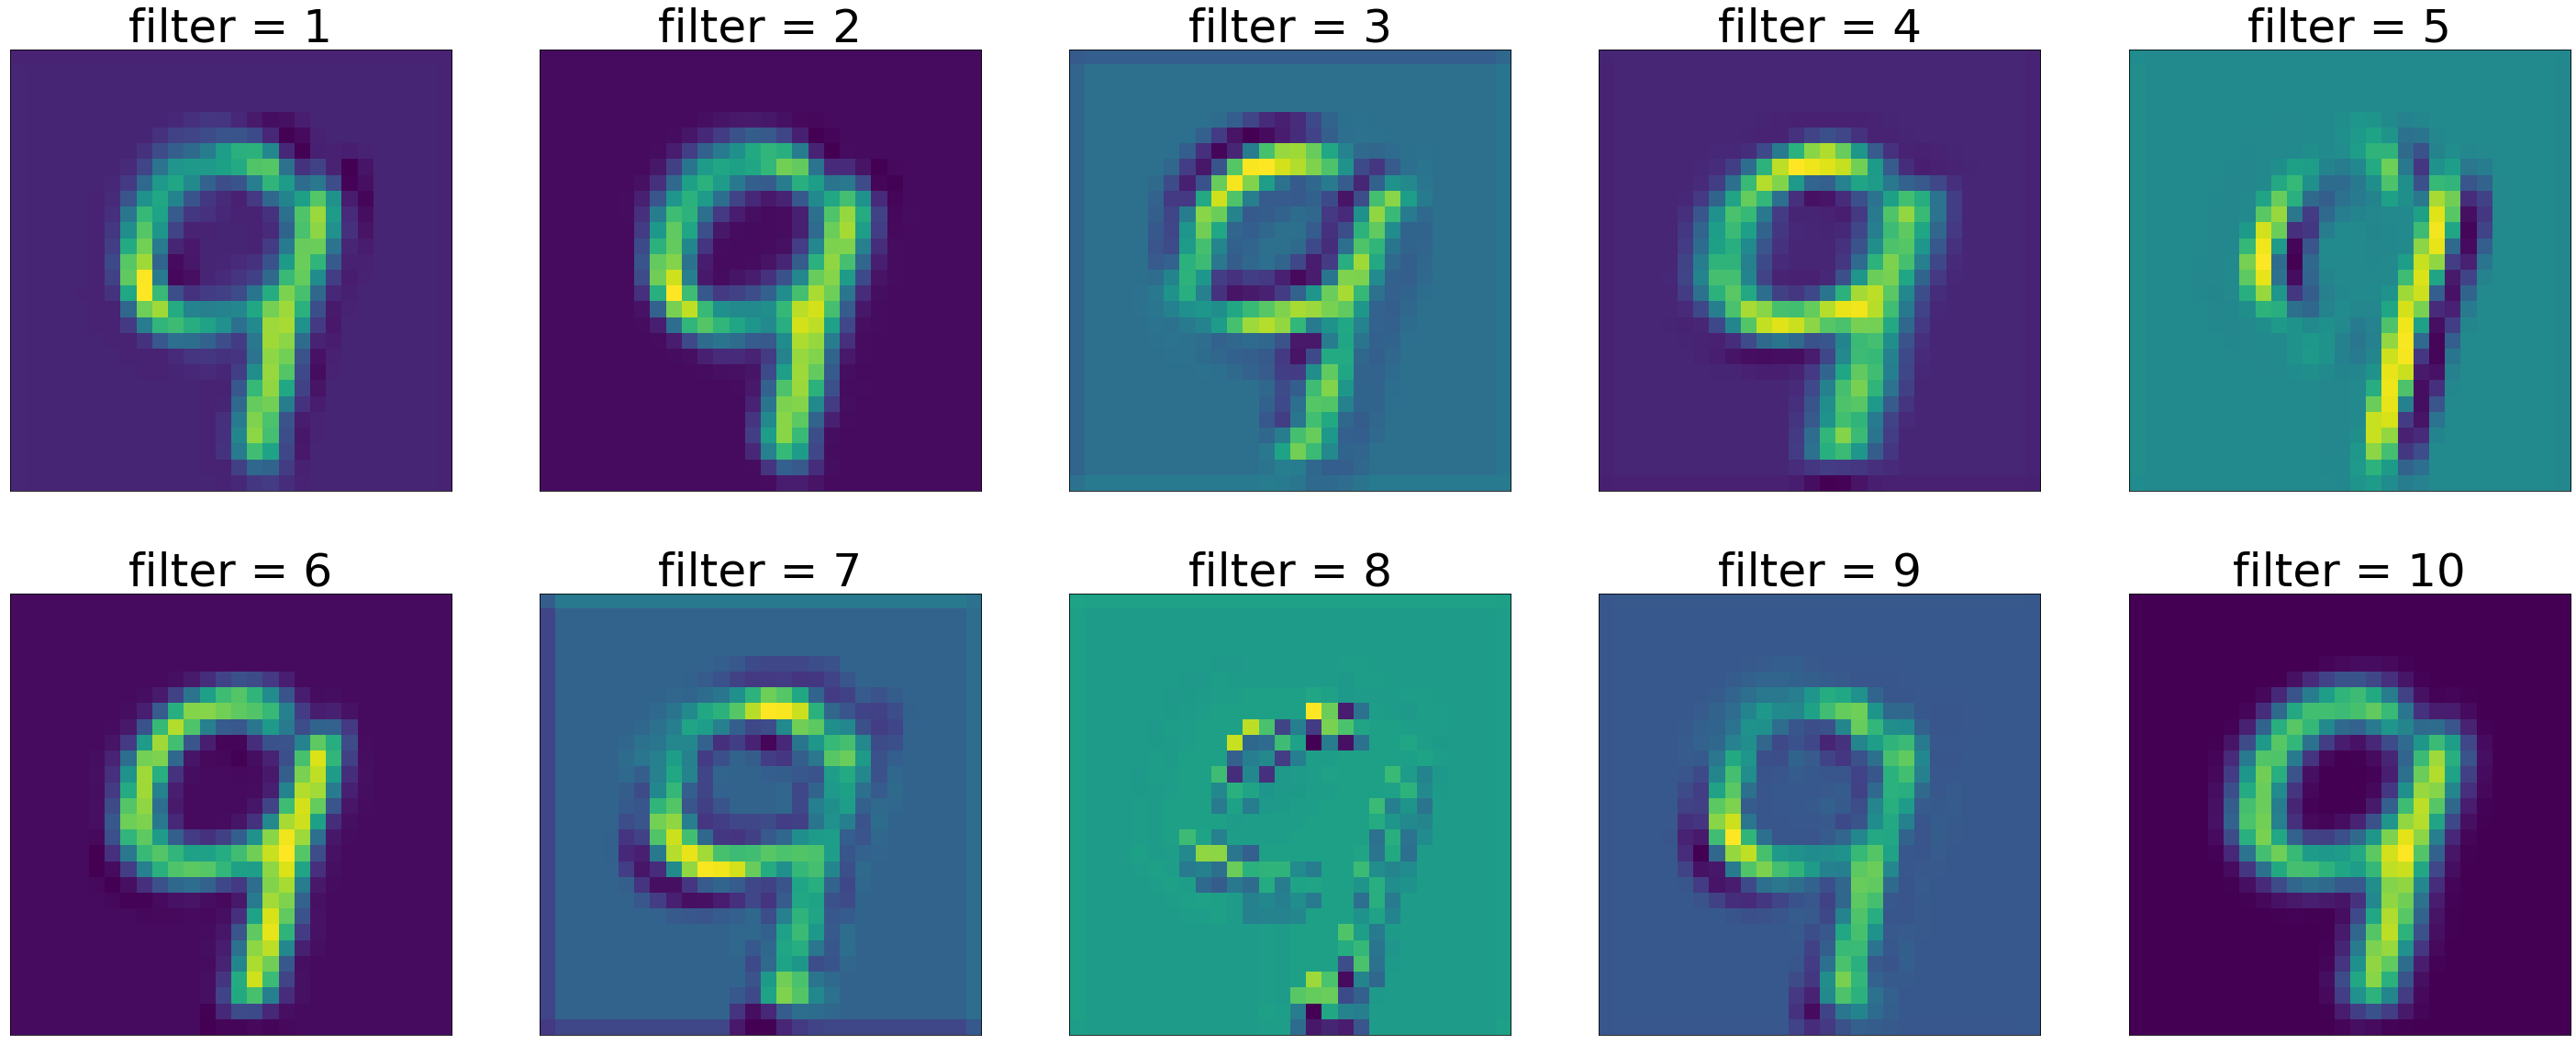

In [24]:
# examine the image patterns associated with each filter in the second convolutional layer
output_deconvnet_images(x_test[16], 'conv_1')

The first convolutional layer seems to be identifying the general outline of the number 9.

conv_2



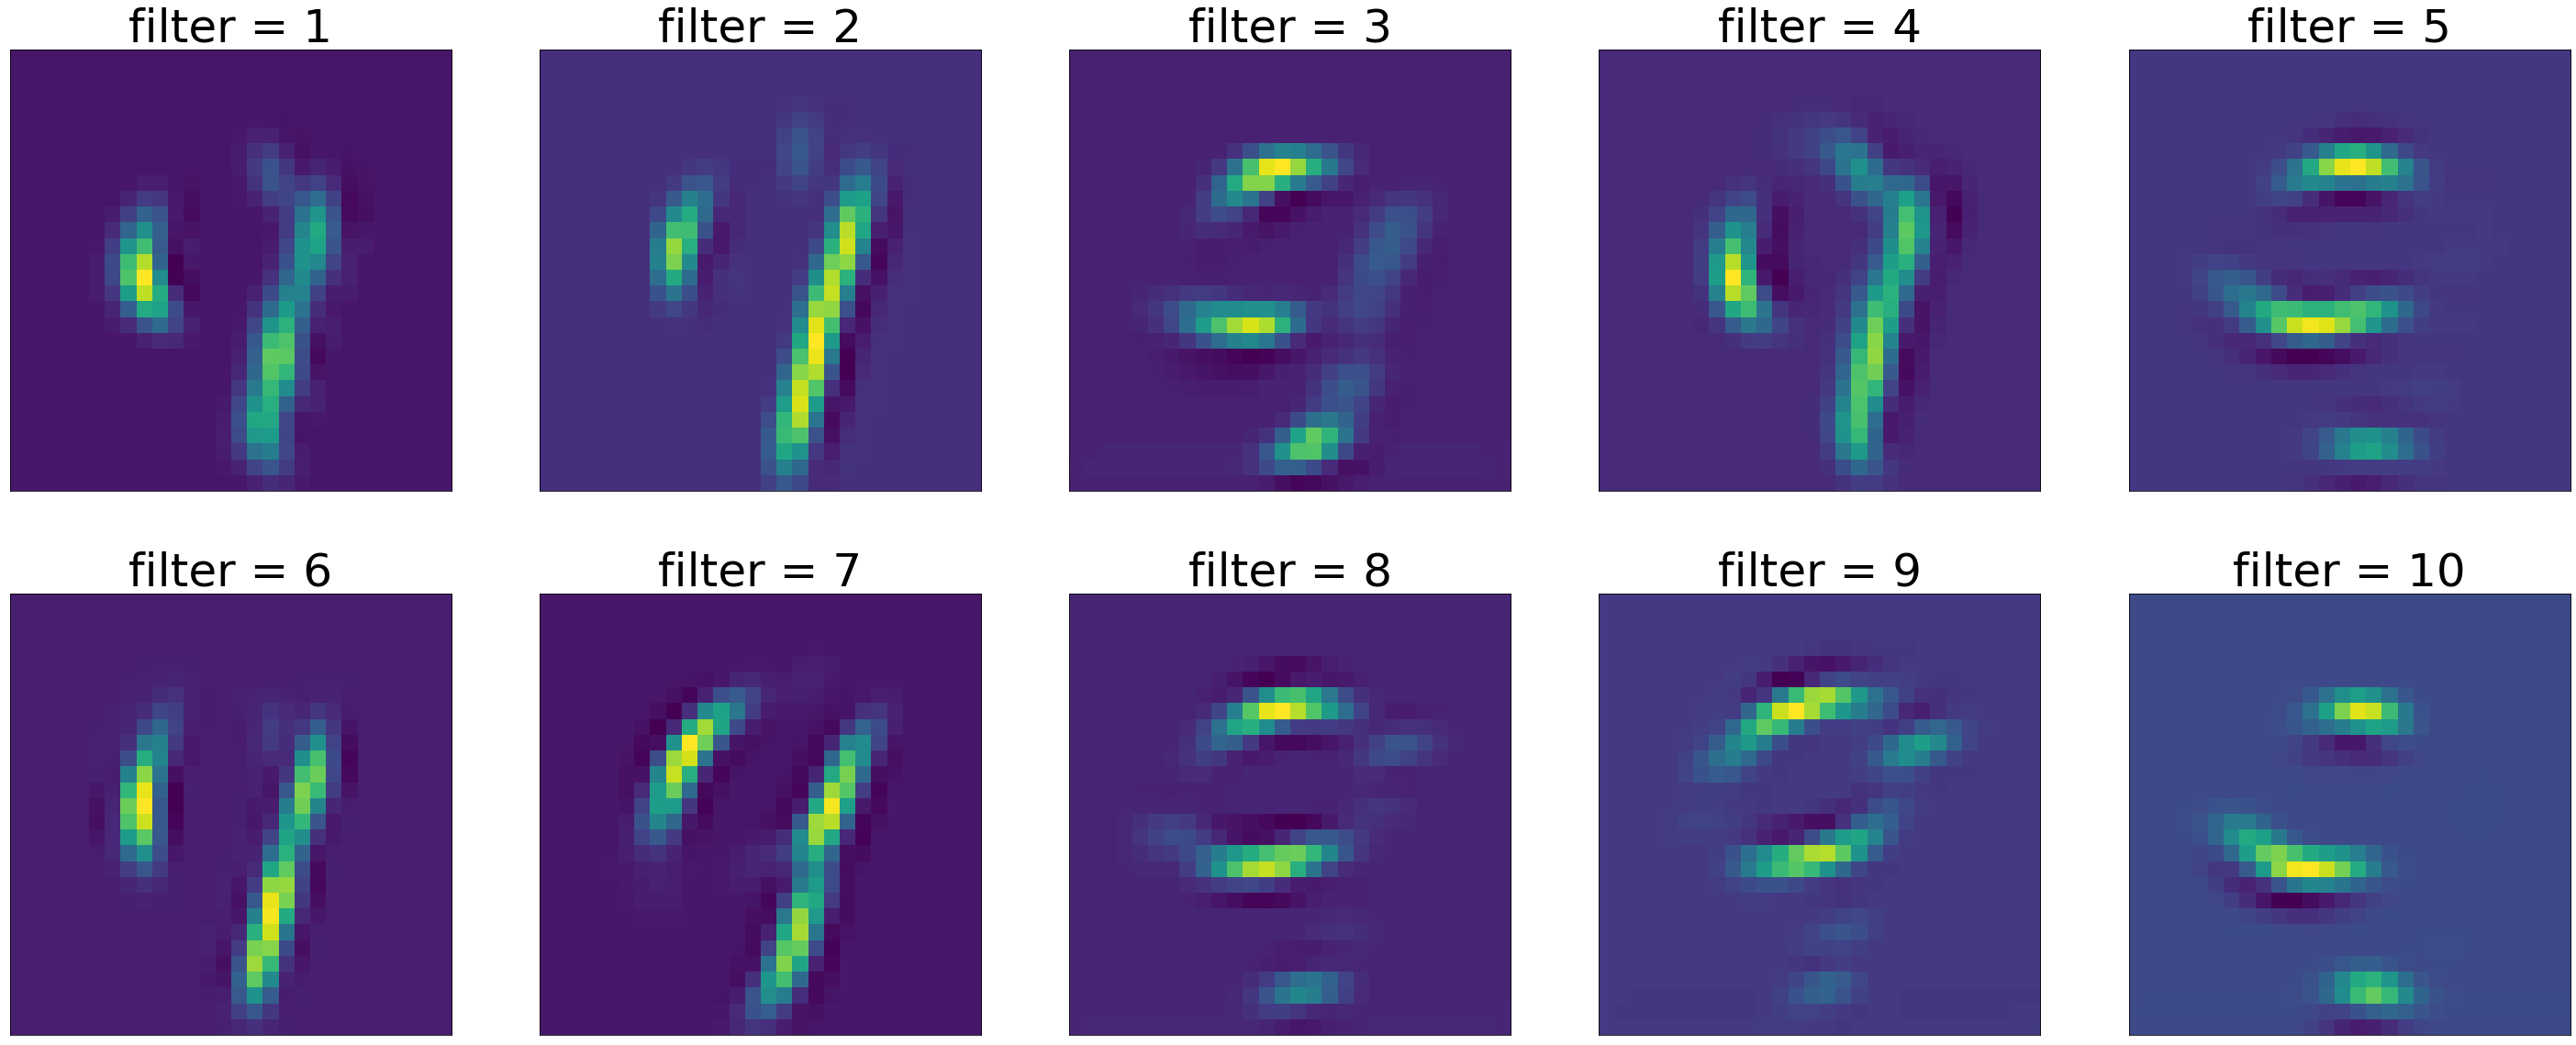

In [25]:
# examine the image patterns associated with each filter in the second convolutional layer
output_deconvnet_images(x_test[16], 'conv_2')

As previously stated, the second convolutional layer seems to identify the different sections of the number 9. Some filters (5, 8 and 9) appear to be identifying the circular component of the number 9 while others identify the vertical lines (filters 2, 6 and 7) which when combined with the circular component form the number 9.

## Conclusion

Examining the results above it would appear that the first convolutional layer is identifying the general outline of each of the examined digits. On the other hand, the deeper convolutional layer appears to be able to identify more specific details of the different numbers, these results would appear to visually confirm the general belief that deeper convolutional layers learn more specific features of an input image. 

In the second convolutional layer individual curves and lines appear to be identified by the different filters. Some filters appear to identify straight lines (both vertical and horizontal) while others are able to identify circular shapes. For example, when examining the second convolutional layer across the three images, filter 6 appears to identify vertical patterns, while filter 10 appears to identify more horizontal patterns. Filter 5 appears to identify circular patterns which exists in the input image, in this case we can see that circular patterns were identified for the 0 and 9 digits with a less clear pattern displayed for number 4. This would make sense given that the number 4 does not generally have a circular component. 

To conclude, it appears that the DeconvNet visualisation procedure is a very useful visualisation method when one wishes to identify the inner operations of their CNN model. For those of a mathematical/scientific background the idea of applying a CNN model to a dataset and not understanding what exactly it is learning goes against our inquisitive nature. Thus, this method provides the possibility for the user to understand exactly what their model is learning and provides a possibility to check that the model is in fact learning useful information and is not randomly learning the different classes in their dataset. It also ensures that the CNN model does not remain a black box procedure where the user has no idea what it is doing. 

